# Spaceship titanic

## Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import neighbors
import torch
from torch import nn
import torch.nn.functional as functional
import copy

# from gudkit.ml import CustomDataset, preprocessing, see_correlation, knn_param_search, MLP, traning_mlp
import gudkit

## Analysis of the dataframe

In [2]:
for dirname, _, filenames in os.walk('/home/gu/ros_ws/src/kaggle-competitions/datas'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/gu/ros_ws/src/kaggle-competitions/datas/in/spaceship_titanic_test.csv
/home/gu/ros_ws/src/kaggle-competitions/datas/in/spaceship_titanic_train.csv
/home/gu/ros_ws/src/kaggle-competitions/datas/out/knn_results.csv
/home/gu/ros_ws/src/kaggle-competitions/datas/out/mlp_results.csv


In [3]:
og_df = pd.read_csv("/home/gu/ros_ws/src/kaggle-competitions/datas/in/spaceship_titanic_train.csv")
og_test_df = pd.read_csv("/home/gu/ros_ws/src/kaggle-competitions/datas/in/spaceship_titanic_test.csv")

In [4]:
og_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
og_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


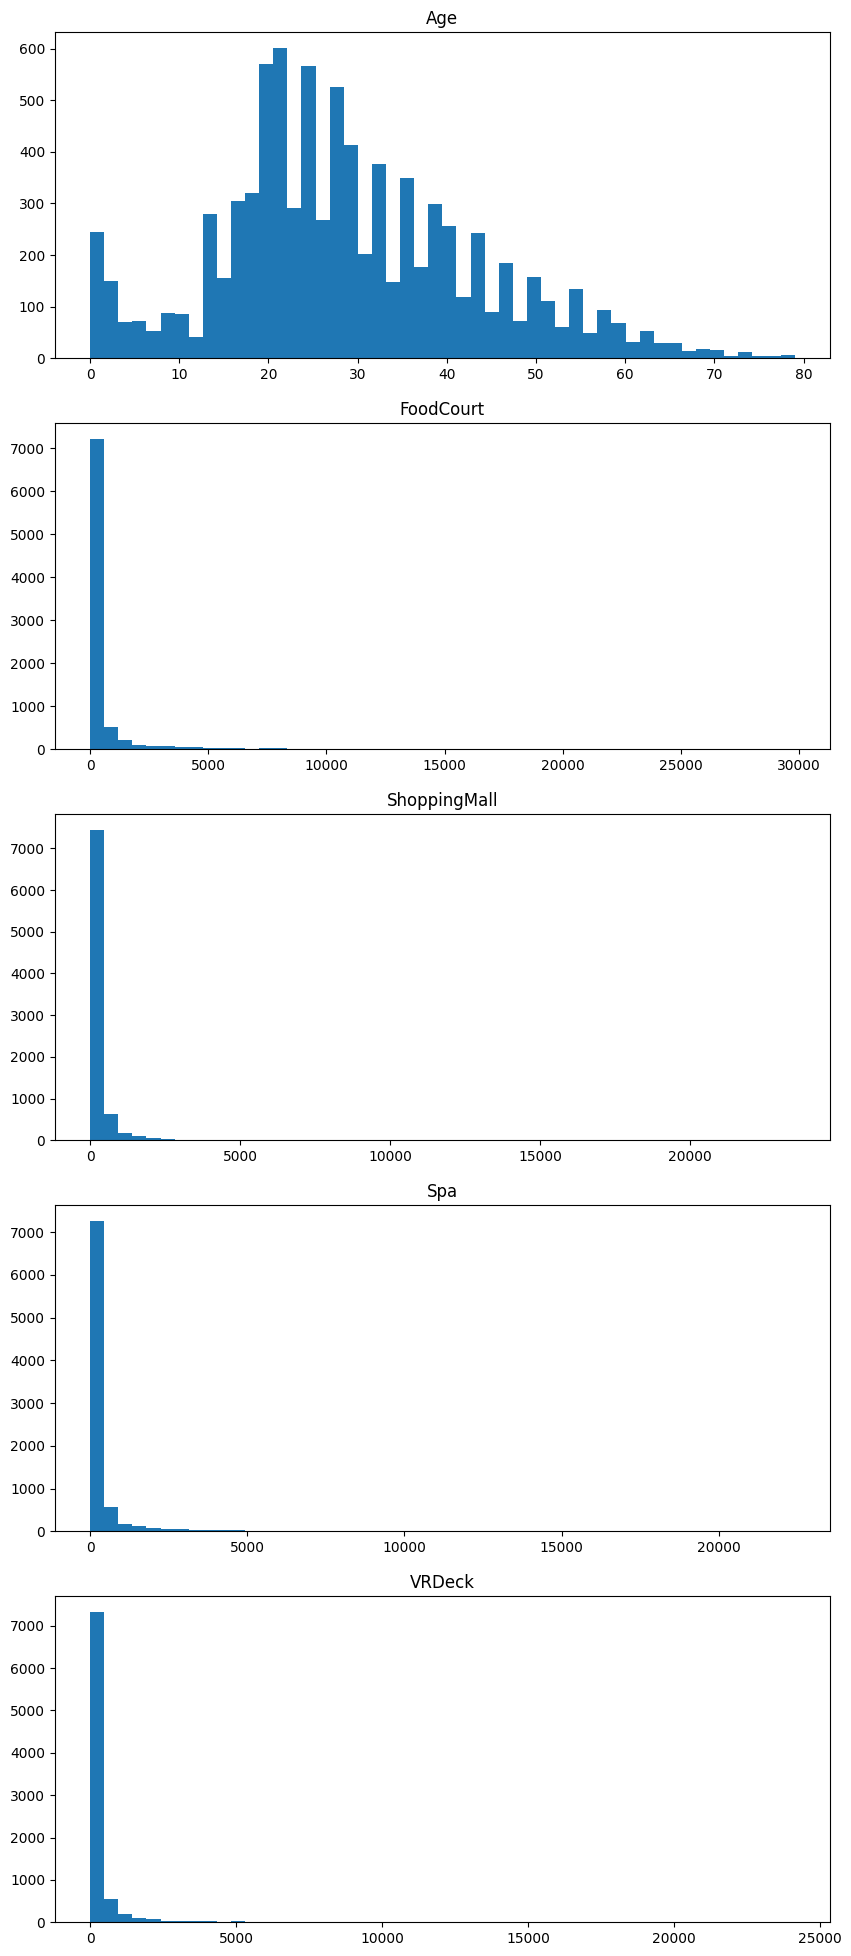

In [6]:
columns = [ 'Age', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
fig, axs = plt.subplots(len(columns),1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)
for i, ax in enumerate(axs):
    ax.set_title(columns[i])
    ax.hist(og_df[columns[i]], bins=50)

In [7]:
og_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Preprocessing

In [8]:
df = gudkit.ml.preprocessing(og_df)
test_df = gudkit.ml.preprocessing(og_test_df)
df.head()

AttributeError: module 'gudkit' has no attribute 'ml'

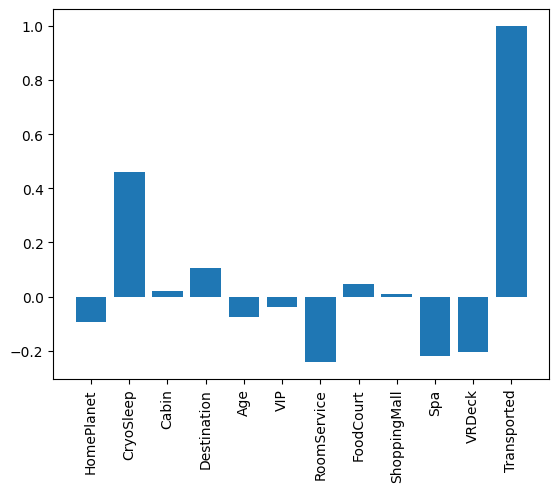

In [ ]:
gudkit.ml.see_correlation(df, 'Transported')

## Preparing data for feeding to models

In [ ]:
df_train, df_valid = torch.utils.data.random_split(df, [0.8, 0.2])
dt_train = gudkit.ml.CustomDataset(df_train.dataset, 'Transported')
dt_valid = gudkit.ml.CustomDataset(df_valid.dataset, 'Transported')
kwargs = {'batch_size': 100, 'num_workers': 6}
loader_train = torch.utils.data.DataLoader(dt_train, **kwargs, shuffle=True)
loader_valid = torch.utils.data.DataLoader(dt_valid, **kwargs, shuffle=True)

### KNN

#### Training

In [ ]:
classifier, data = gudkit.ml.knn_param_search(dt_train.xs.values, dt_train.ys.values, dt_valid.xs.values, dt_valid.ys.values)

Metric: manhattan; k:   1; Accuracy: 99.94%
Metric: manhattan; k:   3; Accuracy: 84.86%
Metric: manhattan; k:   5; Accuracy: 82.37%
Metric: manhattan; k:  10; Accuracy: 80.51%
Metric: manhattan; k:  25; Accuracy: 78.95%
Metric: manhattan; k:  50; Accuracy: 78.06%
Metric: manhattan; k: 100; Accuracy: 75.66%
Metric: manhattan; k: 250; Accuracy: 69.07%
Metric: euclidean; k:   1; Accuracy: 99.94%
Metric: euclidean; k:   3; Accuracy: 84.80%
Metric: euclidean; k:   5; Accuracy: 82.27%
Metric: euclidean; k:  10; Accuracy: 80.52%
Metric: euclidean; k:  25; Accuracy: 79.01%
Metric: euclidean; k:  50; Accuracy: 78.37%
Metric: euclidean; k: 100; Accuracy: 77.07%
Metric: euclidean; k: 250; Accuracy: 71.79%
Metric: chebyshev; k:   1; Accuracy: 99.94%
Metric: chebyshev; k:   3; Accuracy: 84.91%
Metric: chebyshev; k:   5; Accuracy: 82.10%
Metric: chebyshev; k:  10; Accuracy: 80.40%
Metric: chebyshev; k:  25; Accuracy: 79.08%
Metric: chebyshev; k:  50; Accuracy: 78.58%
Metric: chebyshev; k: 100; Accur

#### Predictions

In [ ]:
X_test = test_df.values
predictions = classifier.predict(X_test)
og_test_df['Transported'] = predictions.astype(bool)
result = og_test_df.iloc[:, [0, -1]]
result.to_csv('/home/gu/ros_ws/src/kaggle-competitions/datas/out/knn_results.csv', index=False)

### MLP

Learning rate: 0.1; N hidden neurons: 10; Epoch: 50/50; Time: 17.89[sec]; valid accuracy mean: 0.5017; valid accuracy max: 0.5043
----------------------------------------------------------------------------------------------------
Learning rate: 0.1; N hidden neurons: 100; Epoch: 50/50; Time: 17.85[sec]; valid accuracy mean: 0.5023; valid accuracy max: 0.5066
----------------------------------------------------------------------------------------------------
Learning rate: 0.1; N hidden neurons: 1000; Epoch: 50/50; Time: 18.45[sec]; valid accuracy mean: 0.5058; valid accuracy max: 0.6641
----------------------------------------------------------------------------------------------------
Learning rate: 0.01; N hidden neurons: 10; Epoch: 50/50; Time: 17.72[sec]; valid accuracy mean: 0.5111; valid accuracy max: 0.5380
----------------------------------------------------------------------------------------------------
Learning rate: 0.01; N hidden neurons: 100; Epoch: 50/50; Time: 18.12[se

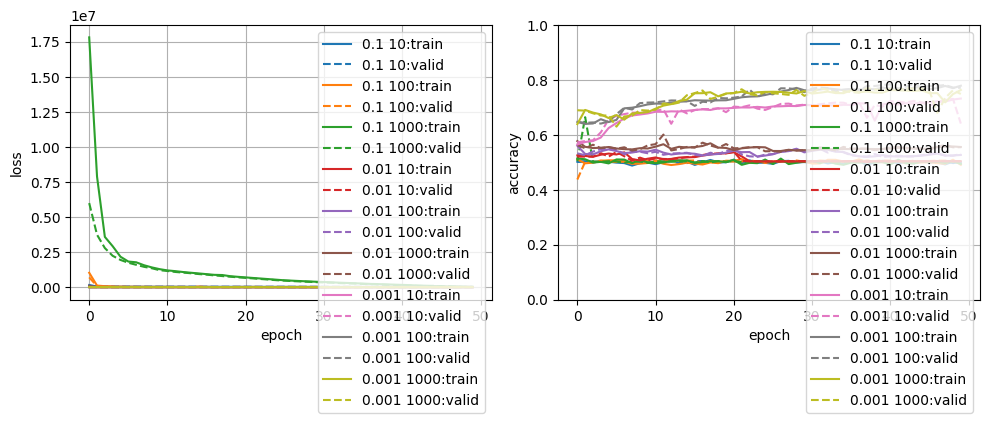

In [ ]:
best_model = gudkit.ml.test_mlps(loader_train, loader_valid, )

In [ ]:
model = best_model[0]
og_test_df['Transported'] = model.predict(test_df.values)
result = og_test_df.iloc[:, [0, -1]]
result.to_csv('/home/gu/ros_ws/src/kaggle-competitions/datas/out/mlp_results.csv', index=False)